In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.linalg import svd
import scipy.linalg as la
from scipy.linalg import sqrtm
from numpy.linalg import matrix_power

In [2]:
X=np.array([[0,1],[1,0]])
Y=np.array([[0,-1j],[1j,0]])
Z=np.array([[1,0],[0,-1]])
Hadamard=np.array([[1,1],[1,-1]])/np.sqrt(2)
rang=2
def get_rho(d,k): # generator of density matrices
    psi = np.reshape(np.array([np.random.normal() for i in range(d*k)]) + 1j*np.array([np.random.normal() for i in range(d*k)]), (d*k,1))
    psi=psi/(np.sqrt(psi.conjugate().T@psi))
    psi= np.reshape(psi, (d, k))
    return psi@psi.T.conjugate()
def H(t):
    return np.pi*Z+(np.pi*5/2)*np.cos(5*t)*X
def Fidelity(a,b):
    return np.real(np.trace(sqrtm(sqrtm(b)@a@sqrtm(b)))**2)
def evol_Neumann(rho_0,t_init=0,t_stop=2,n_steps=3000,Hamiltonian=H):
    dt=(t_stop-t_init)/n_steps
    t=t_init
    rho=np.array([rho0])
    for i in range(n_steps):
        rho=np.append(rho,np.array([rho[i]+1j*rho[i]@Hamiltonian(t)*dt-1j*Hamiltonian(t)@rho[i]*dt]),axis=0)
        t+=dt
    t_samples=np.array([i*dt for i in range(n_steps+1)])
    Fidelity_samples=np.array([Fidelity(rho0,rho[i]) for i in range(n_steps+1)])
    plt.plot(t_samples, Fidelity_samples, '-')
    plt.xlabel('$time$')
    plt.ylabel('Fidelity')
    plt.show()
    return (rho,t_samples,Fidelity_samples)
def matrix_exp(matrix):
    a=np.linalg.eig(matrix)
    return a[1]@np.diag(np.exp(a[0]))@a[1].conjugate().T
def U(t,dt,Hamiltonian=H):
    return matrix_exp(-1j*Hamiltonian(t)*dt)
def evol_Unitary(rho_0,t_init=0,t_stop=2,n_steps=2000,Hamiltonian=H):
    dt=(t_stop-t_init)/n_steps
    t=t_init
    rho=np.array([rho0])
    for i in range(n_steps):
        rho=np.append(rho,U(t,dt)@np.array([rho[i]@U(t,dt).T.conjugate()]),axis=0)
        t+=dt
    t_samples=np.array([i*dt for i in range(n_steps+1)])
    Fidelity_samples=np.array([Fidelity(rho0,rho[i]) for i in range(n_steps+1)])
    plt.plot(t_samples, Fidelity_samples, '-')
    plt.xlabel('$time$')
    plt.ylabel('Fidelity')
    plt.show()
    return (rho,t_samples,Fidelity_samples)

In [3]:
rho0=get_rho(rang,rang) #initial state preparation
print(rho0)

[[0.73463368+1.14018353e-17j 0.23495264-2.44340046e-01j]
 [0.23495264+2.44340046e-01j 0.26536632-9.59759472e-19j]]


# Neumann

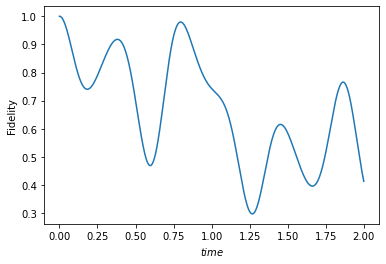

[[ 0.38061196-9.49761103e-17j -0.41794885-6.20744017e-02j]
 [-0.41794885+6.20744017e-02j  0.61938804+1.16551734e-16j]]


In [4]:
rho1,t_neumann,Fidelity_neumann=evol_Neumann(rho0,0,2)
print(rho1[-1])

# evolution operator

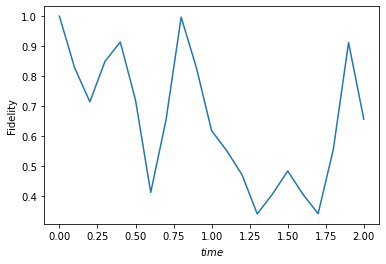

[[ 0.36902871+2.77555756e-17j -0.21556371-3.26092891e-01j]
 [-0.21556371+3.26092891e-01j  0.63097129+8.32667268e-17j]]


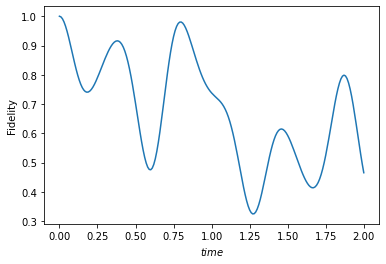

[[ 0.37564223-6.24500451e-17j -0.382865  -8.89230119e-02j]
 [-0.382865  +8.89230119e-02j  0.62435777+1.29236899e-16j]]


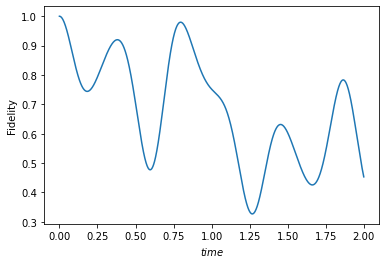

[[ 0.38820388+2.30718222e-16j -0.39209109-6.10243089e-02j]
 [-0.39209109+6.10243089e-02j  0.61179612-2.40367622e-16j]]


In [5]:
print(evol_Unitary(rho0,0,2,n_steps=20)[0][-1])
print(evol_Unitary(rho0,0,2,n_steps=200)[0][-1])
rho2,t_unitary,Fidelity_unitary=evol_Unitary(rho0,0,2)
print(rho2[-1])

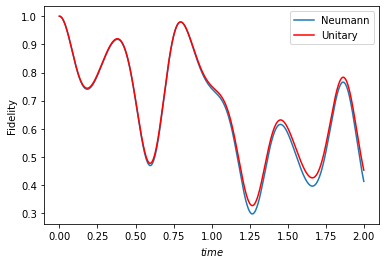

In [6]:
plt.plot(t_neumann,Fidelity_neumann,label="Neumann")
plt.plot(t_unitary,Fidelity_unitary,label="Unitary",color="red")
plt.legend(['Neumann', 'Unitary'])
plt.xlabel('$time$')
plt.ylabel('Fidelity')
plt.show()

# Part 2 (Kraus gates)

In [7]:
p=0.15
E_1=np.array(np.eye(2)*np.sqrt(1-p))
E_2=np.array(X*np.sqrt(p/3))
E_3=np.array(Y*np.sqrt(p/3))
E_4=np.array(Z*np.sqrt(p/3))
E=np.array([E_1,E_2,E_3,E_4])
e=np.array([E[i].T.reshape((1,4))[0] for i in range(len(E))]).T
hi=e@e.T.conjugate()
print('hi matrix:\n',hi)
print('partial trace on the second system:\n',np.trace(hi.reshape([2,2,2,2]),axis1=0,axis2=2))# partial trace on the second system
G=np.array([np.kron(E[i].conjugate(),E[i]) for i in range(len(E))]).sum(axis=0)# superoperator(superpuper)
print('superoperator:\n',G)

hi matrix:
 [[0.9+0.j 0. +0.j 0. +0.j 0.8+0.j]
 [0. +0.j 0.1+0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0.1+0.j 0. +0.j]
 [0.8+0.j 0. +0.j 0. +0.j 0.9+0.j]]
partial trace on the second system:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
superoperator:
 [[0.9+0.j 0. +0.j 0. +0.j 0.1+0.j]
 [0. +0.j 0.8+0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0.8+0.j 0. +0.j]
 [0.1+0.j 0. +0.j 0. +0.j 0.9+0.j]]


# Verification

In [8]:
print("random density matrix:\n",rho0)
rho_Kraus=np.array([E[i]@rho0@E[i].T.conjugate() for i in range(len(E))]).sum(axis=0)
print('Kraus decomposition:\n',rho_Kraus)
A=np.array([[[1,0],[0,0]],[[0,0],[1,0]],[[0,1],[0,0]],[[0,0],[0,1]]])
rho_hi=np.array([hi[m][n]*A[m]@rho0@A[n].T.conjugate() for n in range(len(hi)) for m in range(len(hi))]).sum(axis=0)
print("transformation using hi matrices:\n",rho_hi)
rho_superop=(G@(rho0.T.reshape((4,1)))).reshape((2,2)).T
print("result of action superoperator G:\n",rho_superop)

random density matrix:
 [[0.73463368+1.14018353e-17j 0.23495264-2.44340046e-01j]
 [0.23495264+2.44340046e-01j 0.26536632-9.59759472e-19j]]
Kraus decomposition:
 [[0.68770694+1.01656758e-17j 0.18796211-1.95472037e-01j]
 [0.18796211+1.95472037e-01j 0.31229306+2.76400002e-19j]]
transformation using hi matrices:
 [[0.68770694+1.01656758e-17j 0.18796211-1.95472037e-01j]
 [0.18796211+1.95472037e-01j 0.31229306+2.76400002e-19j]]
result of action superoperator G:
 [[0.68770694+1.01656758e-17j 0.18796211-1.95472037e-01j]
 [0.18796211+1.95472037e-01j 0.31229306+2.76400002e-19j]]
